**First, let's import needed libraries to display the custom_heuristic and baseline_heuristic plots.**

In [1]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
#%matplotlib inline

**Next, let's create two dictionaries to host the result of each agent based on the heuristic functions**

In [2]:
custom_fn_agent_win_rate = {}
baseline_fn_agent_win_rate = {}

**Next, we create a function to extract the win-rates for both heuristic functions and and pass it to the plot bar-graph function below.<br>This displays the result of playing 400 games with fair matches, using Minimax with greedy-first-choice and random-first-choice moves**

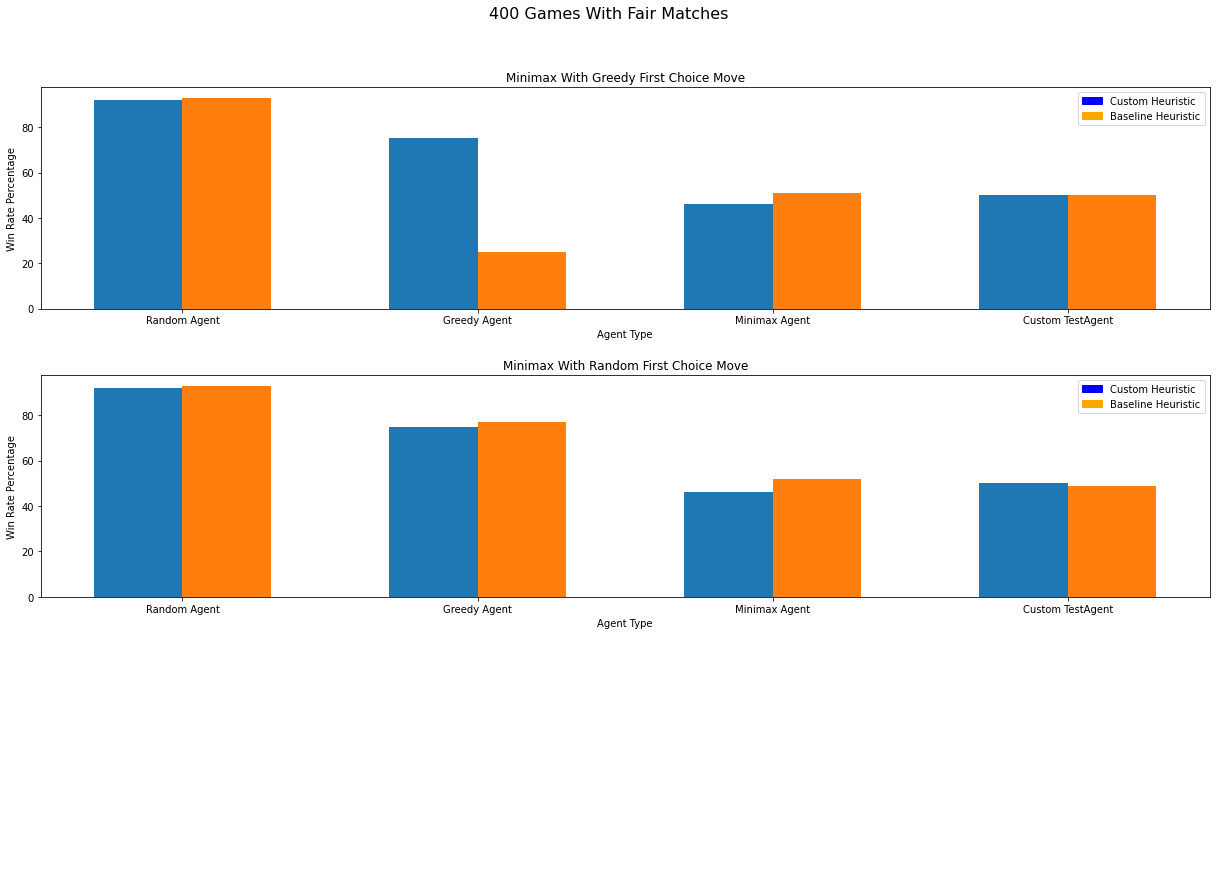

In [3]:
figsize = (17, 13)
figure, [axis1, axis2, axis3] = plt.subplots(3, 1, figsize=figsize)

def get_win_rate_dictionaries(match_results_file_name):
    with open(match_results_file_name, 'r') as input_file_object:
        lines = input_file_object.readlines()
        for line in lines:
            if "Your agent won " in line:
                line_words_list = line.split(' ')
                heuristic_type = line_words_list[-1][:-2]
                #print("heuristic_type: " + str(heuristic_type))

                agent_type_start_index = line_words_list.index("against") + 1
                agent_type_end_index = agent_type_start_index + 1
                agent_type = ' '.join(line_words_list[agent_type_start_index:agent_type_end_index+1])
                #print("agent_type: " + str(agent_type))

                for word in line_words_list:
                    if '%' in word:
                        win_rate = int(float(word[:word.index('%')]))
                        #print("win_rate: " + str(win_rate))

                if heuristic_type == "custom":	
                    custom_fn_agent_win_rate[agent_type] = win_rate
                elif heuristic_type == "baseline":
                    baseline_fn_agent_win_rate[agent_type] = win_rate

    return custom_fn_agent_win_rate, baseline_fn_agent_win_rate


def plot_bar_graph(axis, axis_title, custom_fn_agent_win_rate, baseline_fn_agent_win_rate):
    X = list(custom_fn_agent_win_rate.keys())
    numerical_X = np.arange(len(X))

    custom_heuristic_Y = list(custom_fn_agent_win_rate.values())
    baseline_heuristic_Y = list(baseline_fn_agent_win_rate.values())

    axis.bar(numerical_X-0.15, custom_heuristic_Y, width=0.30, align="center")
    axis.bar(numerical_X+0.15, baseline_heuristic_Y, width=0.30, align="center")

    blue_patch = mpatches.Patch(color="blue", label="Custom Heuristic")
    orange_patch = mpatches.Patch(color="orange", label="Baseline Heuristic")

    axis.legend(handles=[blue_patch, orange_patch])

    axis.set_xticks(numerical_X)
    axis.set_xticklabels(X)

    axis.set_xlabel("Agent Type")
    axis.set_ylabel("Win Rate Percentage")

    axis.set_title(axis_title)
    

with PdfPages("report.pdf") as pdf:
    plot_bar_graph(axis1, "Minimax With Greedy First Choice Move", *get_win_rate_dictionaries("match_results.txt"))
    plot_bar_graph(axis2, "Minimax With Random First Choice Move", *get_win_rate_dictionaries("random_initial_move_match_results.txt"))

    axis3.axis("off")
    axis3_caption_text = ""
    axis3.text(0.0, 0.05, axis3_caption_text, wrap=True)

    plt.suptitle("400 Games With Fair Matches", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    figure.subplots_adjust(hspace=0.30)

    pdf.savefig()

    plt.show()